In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68355746dc15697c0fecdafdecf88a0b


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


597

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | porto velho
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | sorland
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | gamba
Processing Record 15 of Set 1 | hualmay
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | scarborough
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | qaanaaq
Pr

Processing Record 38 of Set 4 | saskylakh
Processing Record 39 of Set 4 | khorixas
Processing Record 40 of Set 4 | aitape
Processing Record 41 of Set 4 | camacha
Processing Record 42 of Set 4 | matagami
Processing Record 43 of Set 4 | ryotsu
Processing Record 44 of Set 4 | bereda
Processing Record 45 of Set 4 | port hedland
Processing Record 46 of Set 4 | sur
Processing Record 47 of Set 4 | komsomolskiy
Processing Record 48 of Set 4 | upernavik
Processing Record 49 of Set 4 | nikolskoye
Processing Record 50 of Set 4 | bandundu
Processing Record 1 of Set 5 | emba
Processing Record 2 of Set 5 | ilheus
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | tunduru
City not found. Skipping...
Processing Record 5 of Set 5 | mocambique
City not found. Skipping...
Processing Record 6 of Set 5 | khandyga
Processing Record 7 of Set 5 | aripuana
Processing Record 8 of Set 5 | teshie
Processing Record 9 of Set 5 | muros
Processing Record 10 of Set 5 | searcy
Processing Record 11 of S

Processing Record 24 of Set 8 | coquimbo
Processing Record 25 of Set 8 | mayo
Processing Record 26 of Set 8 | satitoa
City not found. Skipping...
Processing Record 27 of Set 8 | contamana
Processing Record 28 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 29 of Set 8 | goderich
Processing Record 30 of Set 8 | bandarbeyla
Processing Record 31 of Set 8 | havre-saint-pierre
Processing Record 32 of Set 8 | beisfjord
Processing Record 33 of Set 8 | nara
Processing Record 34 of Set 8 | mogok
Processing Record 35 of Set 8 | kupang
Processing Record 36 of Set 8 | krasnyy yar
Processing Record 37 of Set 8 | joensuu
Processing Record 38 of Set 8 | makakilo city
Processing Record 39 of Set 8 | shibarghan
City not found. Skipping...
Processing Record 40 of Set 8 | kathua
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | methoni
Processing Record 43 of Set 8 | talavera
Processing Record 44 of Set 8 | pizarro
Processing Record 45 of Set 8 | rehoboth
Proces

Processing Record 14 of Set 12 | dusti
Processing Record 15 of Set 12 | bolivar
Processing Record 16 of Set 12 | omboue
Processing Record 17 of Set 12 | puerto carreno
Processing Record 18 of Set 12 | swan river
Processing Record 19 of Set 12 | ust-kan
Processing Record 20 of Set 12 | kita
Processing Record 21 of Set 12 | la rioja
Processing Record 22 of Set 12 | horsham
Processing Record 23 of Set 12 | sjovegan
Processing Record 24 of Set 12 | kirakira
Processing Record 25 of Set 12 | pokhara
Processing Record 26 of Set 12 | port keats
Processing Record 27 of Set 12 | mount gambier
Processing Record 28 of Set 12 | macusani
Processing Record 29 of Set 12 | poland
Processing Record 30 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 31 of Set 12 | beringovskiy
Processing Record 32 of Set 12 | san policarpo
Processing Record 33 of Set 12 | zhigalovo
Processing Record 34 of Set 12 | oxapampa
Processing Record 35 of Set 12 | sanandaj
Processing Record 36 of 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,84.25,74,20,13.80,CK,2021-12-15 21:06:39
1,Mar Del Plata,-38.0023,-57.5575,65.88,77,4,13.00,AR,2021-12-15 21:06:39
2,Klaksvik,62.2266,-6.5890,45.52,77,11,32.08,FO,2021-12-15 21:06:39
3,Cape Town,-33.9258,18.4232,60.35,65,94,3.00,ZA,2021-12-15 21:05:43
4,Atuona,-9.8000,-139.0333,78.24,75,18,16.53,PF,2021-12-15 21:06:40
5,Airai,-8.9266,125.4092,60.06,76,11,1.90,TL,2021-12-15 21:06:41
6,Porto Velho,-8.7619,-63.9039,77.05,94,75,2.30,BR,2021-12-15 21:06:41
7,Ponta Do Sol,32.6667,-17.1000,62.71,70,43,7.92,PT,2021-12-15 21:06:41
8,Sorland,67.6670,12.6934,39.27,69,100,27.18,NO,2021-12-15 21:06:42
9,Georgetown,5.4112,100.3354,81.90,82,20,1.01,MY,2021-12-15 21:06:42


In [8]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2021-12-15 21:06:39,-21.2078,-159.7750,84.25,74,20,13.80
1,Mar Del Plata,AR,2021-12-15 21:06:39,-38.0023,-57.5575,65.88,77,4,13.00
2,Klaksvik,FO,2021-12-15 21:06:39,62.2266,-6.5890,45.52,77,11,32.08
3,Cape Town,ZA,2021-12-15 21:05:43,-33.9258,18.4232,60.35,65,94,3.00
4,Atuona,PF,2021-12-15 21:06:40,-9.8000,-139.0333,78.24,75,18,16.53
5,Airai,TL,2021-12-15 21:06:41,-8.9266,125.4092,60.06,76,11,1.90
6,Porto Velho,BR,2021-12-15 21:06:41,-8.7619,-63.9039,77.05,94,75,2.30
7,Ponta Do Sol,PT,2021-12-15 21:06:41,32.6667,-17.1000,62.71,70,43,7.92
8,Sorland,NO,2021-12-15 21:06:42,67.6670,12.6934,39.27,69,100,27.18
9,Georgetown,MY,2021-12-15 21:06:42,5.4112,100.3354,81.90,82,20,1.01


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


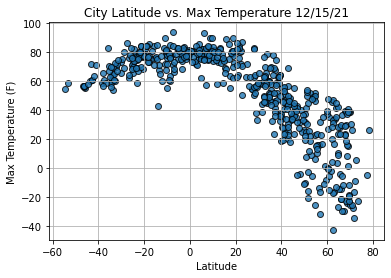

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# plt.gca().invert_yaxis()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

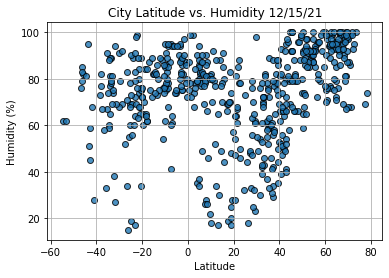

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


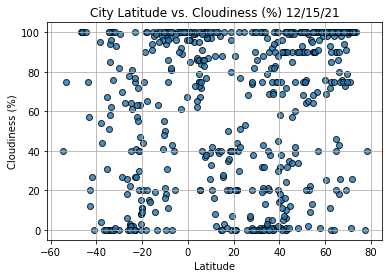

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

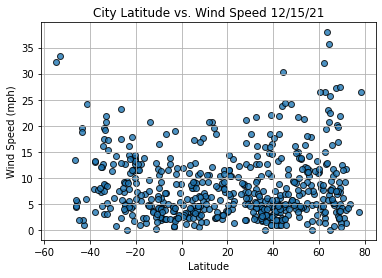

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
      
        # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13=city_data_df.loc[13]
index13

City                 Kruisfontein
Country                        ZA
Date          2021-12-15 21:06:43
Lat                      -34.0033
Lng                       24.7314
Max Temp                    61.88
Humidity                       81
Cloudiness                     58
Wind Speed                  17.45
Name: 13, dtype: object

In [18]:
city_data_df["Lat"]>= 0

0      False
1      False
2       True
3      False
4      False
       ...  
539     True
540     True
541     True
542     True
543    False
Name: Lat, Length: 544, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Klaksvik,FO,2021-12-15 21:06:39,62.2266,-6.5890,45.52,77,11,32.08
7,Ponta Do Sol,PT,2021-12-15 21:06:41,32.6667,-17.1000,62.71,70,43,7.92
8,Sorland,NO,2021-12-15 21:06:42,67.6670,12.6934,39.27,69,100,27.18
9,Georgetown,MY,2021-12-15 21:06:42,5.4112,100.3354,81.90,82,20,1.01
14,Scarborough,GB,2021-12-15 21:02:50,54.2797,-0.4044,50.07,88,13,4.00


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

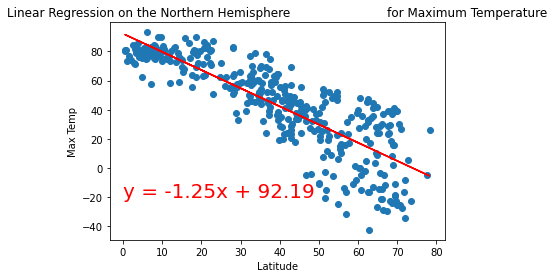

y = -1.25x + 92.19
The r-value is: -0.831


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-20))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

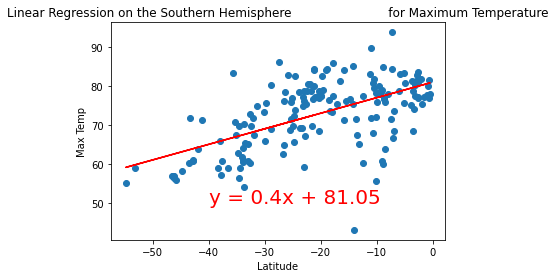

y = 0.4x + 81.05
The r-value is: 0.584


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-40,50))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

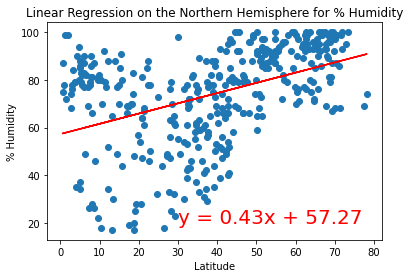

The r-value is: 0.584


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,20))

print(f"The r-value is: {r_value:.3f}")



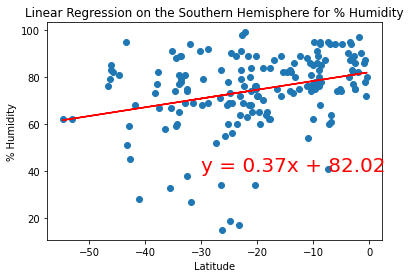

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-30,40))


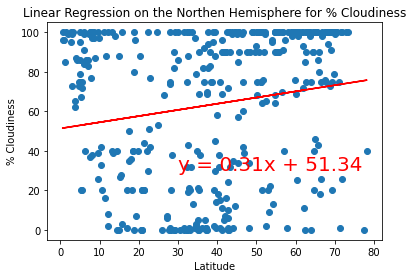

In [25]:
# Linear regression on the Northen Hemisphere
x_values= northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values,y_values,'Linear Regression on the Northen Hemisphere for % Cloudiness','% Cloudiness',(30,30))


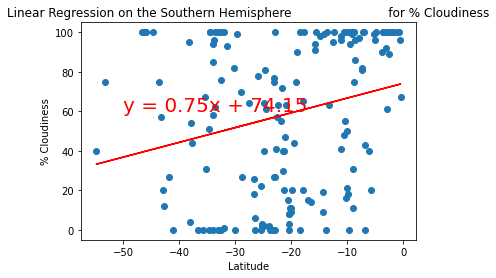

slope is:0.747,intercept is:74.154,r_value is:0.250,P_value is : 0.001,Standard Error is :0.224


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values )
print(f"slope is:{slope:.3f},intercept is:{intercept:.3f},r_value is:{r_value:.3f},P_value is : {p_value:.3f},Standard Error is :{std_err:.3f}")

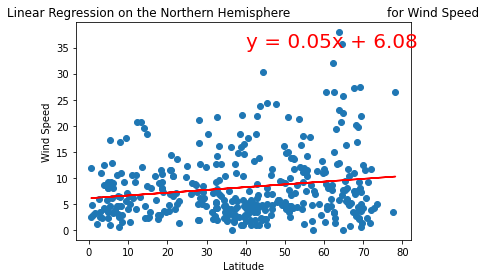

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

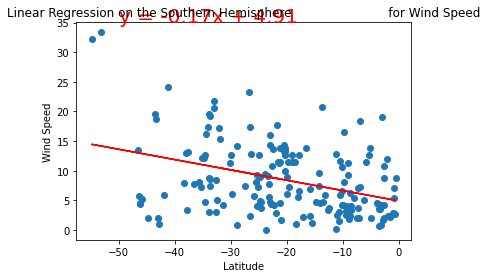

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [32]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests

# Import the API key.
from config import g_key

In [33]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Avarua,CK,2021-12-15 21:06:39,-21.2078,-159.7750,84.25,74,20,13.80
1,1,Mar Del Plata,AR,2021-12-15 21:06:39,-38.0023,-57.5575,65.88,77,4,13.00
2,2,Klaksvik,FO,2021-12-15 21:06:39,62.2266,-6.5890,45.52,77,11,32.08
3,3,Cape Town,ZA,2021-12-15 21:05:43,-33.9258,18.4232,60.35,65,94,3.00
4,4,Atuona,PF,2021-12-15 21:06:40,-9.8000,-139.0333,78.24,75,18,16.53


In [34]:
# get the data types
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [61]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [62]:
# # 1. Assign the locations to an array of latitude and longitude pairs.
# locations = [latitude, longitude]
# # 2. Assign the weights variable to some values.
# temperatures = # an array of length equal to the locations array length
# # 3. Assign the figure variable to the gmaps.figure() attribute.
# fig = gmaps.figure()
# # 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
# heatmap_layer = gmaps.heatmap_layer(locations, weights=temperatures)

# # 5. Add the heatmap layer.
# fig.add_layer(heatmap_layer)
# # 6. Call the figure to plot the data.
# fig

In [63]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [64]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))